# Data exploratory - finalize cleanup of Homes data

### this notebook is in charge of completing the cleanup of Houses data, by removing limits then save the final dataset


### 0. Initialization

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import modules.file_helper as file_help

### 1. Exploratory Data Analysis

In [29]:
#Work with Homes, Sells
global_data = pd.read_csv(os.path.join(file_help.DATA_CURATED_FOLDER, 'Maison'+ file_help.FILE_NAME_OUT_EXT), encoding='utf-8', sep=';', decimal='.')

global_data = global_data[global_data['Nature mutation'] == 'Vente']

# Check the number of data points in the data set
print(f'number of Homes sold : {len(global_data)}')



number of Homes sold : 511136


### 2. Cleanup limits

In [30]:
curated_data = global_data.copy(deep=True)

count    511136.000000
mean        103.268034
std          46.531960
min           0.000000
25%          75.000000
50%          95.000000
75%         123.000000
max        1110.000000
Name: Surface reelle bati, dtype: float64


Text(0.5, 0.98, 'Surface batie')

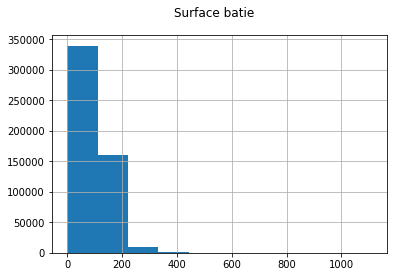

In [31]:
print(global_data['Surface reelle bati'].describe())
global_data['Surface reelle bati'].hist()
plt.suptitle('Surface batie')

Text(0.5, 0.98, 'Surface batie')

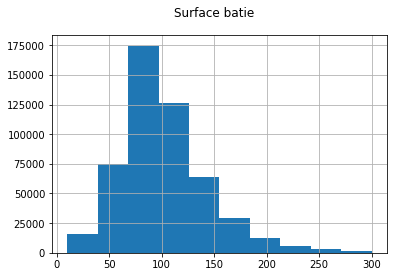

In [32]:
#drop surfaces between 20 and 300
curated_data.drop(curated_data[(curated_data['Surface reelle bati']<10 ) | (curated_data['Surface reelle bati']> 300 )].index, inplace=True)
curated_data['Surface reelle bati'].hist()
plt.suptitle('Surface batie')

count    511136.000000
mean          4.352926
std           1.418854
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          23.000000
Name: Nombre pieces principales, dtype: float64


Text(0.5, 0.98, 'Number of room')

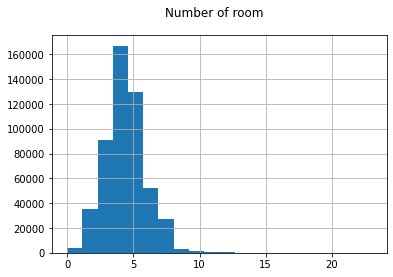

In [33]:
print(global_data['Nombre pieces principales'].describe())
global_data['Nombre pieces principales'].hist(bins=20)
plt.suptitle('Number of room')

Text(0.5, 0.98, 'Number of room')

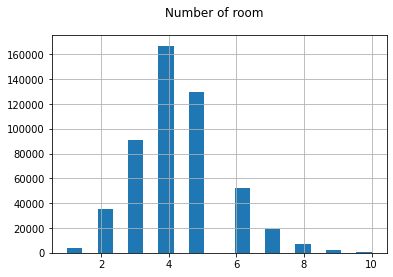

In [34]:
#drop homes with number of rooms > 12
curated_data.drop(curated_data[(curated_data['Nombre pieces principales']> 10 )].index, inplace=True)
curated_data.loc[curated_data['Nombre pieces principales'] == 0] = 1
curated_data['Nombre pieces principales'].hist(bins=20)
plt.suptitle('Number of room')

count    511136.000000
mean        813.530109
std        2903.795869
min           0.000000
25%         238.000000
50%         500.000000
75%         800.000000
max      549300.000000
Name: Surface terrain, dtype: float64


Text(0.5, 0.98, 'Surface terrain')

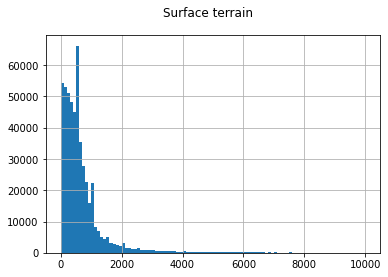

In [35]:
print(global_data['Surface terrain'].describe())
global_data['Surface terrain'].hist(bins=100, range=(0,10000))
plt.suptitle('Surface terrain')

Text(0.5, 0.98, 'Surface terrain')

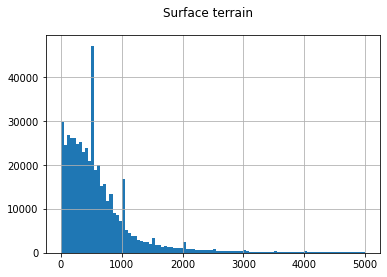

In [36]:
#drop ground surfaces > 5000m²
curated_data.drop(curated_data[(curated_data['Surface terrain']> 5000 )].index, inplace=True)
curated_data['Surface terrain'].hist(bins=100)
plt.suptitle('Surface terrain')

count    5.111360e+05
mean     3.264928e+05
std      5.743433e+06
min      1.500000e-01
25%      1.180000e+05
50%      1.844000e+05
75%      2.900000e+05
max      2.086000e+09
Name: Valeur fonciere, dtype: float64


Text(0.5, 0.98, 'Valeur fonciere')

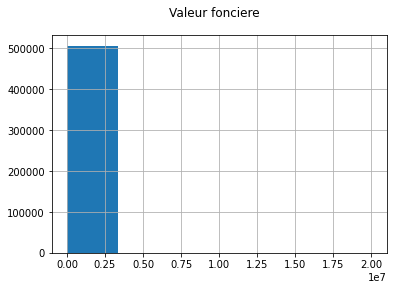

In [37]:
print(global_data['Valeur fonciere'].describe())
global_data['Valeur fonciere'].hist(bins=6, range=(10000,20000000))
plt.suptitle('Valeur fonciere')

Text(0.5, 0.98, 'Valeur fonciere')

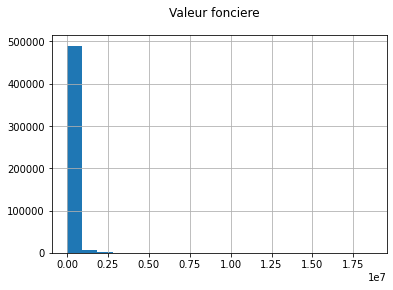

In [38]:
#drop when transaction cost are not between 10k€ and 20m€
curated_data.drop(curated_data[(curated_data['Valeur fonciere']> 20000000 ) | (curated_data['Valeur fonciere'] < 10000)].index, inplace=True)
curated_data['Valeur fonciere'].hist(bins=20)
plt.suptitle('Valeur fonciere')


In [39]:
#store dataset as final dataset 
curated_data.to_csv(os.path.join(file_help.DATA_OUT_FOLDER, 'Maison' + file_help.FILE_NAME_OUT_EXT), index=False, sep=';')
